In [1]:
%reload_ext autoreload
%autoreload 2

# Static potential

In [2]:

#!/usr/bin/env python
# -*- coding:utf-8 -*-
#
# Created: 06/2023
# Author: Carmelo Mordini <cmordini@phys.ethz.ch>


import numpy as np
from pytrans import objectives as obj
from pytrans.conversion import freq_to_curv
from pytrans.ions import Ca40
from pytrans.functions import zpspace
from pytrans.solver import solver, init_waveform

from models.segmented_trap import SegmentedTrap

from pathlib import Path
data_dir = Path('.').resolve() / 'data'

trap = SegmentedTrap()

axial = freq_to_curv(1e6, ion=Ca40)
rtilt = 2e7

n_samples = 1
r0 = (0, 0, trap.z0)
ion = Ca40

waveform = init_waveform(n_samples, trap.n_electrodes)

objectives = [
    obj.GradientObjective(waveform[0], trap, *r0, value=0, ion=Ca40),
    obj.HessianObjective(waveform[0], trap, *r0, entries='xx', value=axial, ion=Ca40),
    obj.HessianObjective(waveform[0], trap, *r0, entries='yz', value=rtilt, ion=Ca40),
]


objectives += [
    obj.VoltageObjective(waveform, 0),  # minimize voltages
    obj.VoltageObjective(waveform, 10, constraint_type='<='),
    obj.VoltageObjective(waveform, -10, constraint_type='>='),
]

solver_results = solver(objectives, verbose=True)
waveform = solver_results.waveform.value  # get array from cvxpy variable

savename = data_dir / 'waveform_static_segmented_trap.npy'
print(f"Saving waveform as ndarray to {savename}")
np.save(savename, waveform)


Compiling objectives: 100%|██████████| 6/6 [00:00<00:00, 750.23it/s]

                                     CVXPY                                     
                                     v1.3.0                                    
(CVXPY) Jul 17 02:37:56 PM: Your problem has 6 variables, 2 constraints, and 0 parameters.
(CVXPY) Jul 17 02:37:56 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 17 02:37:56 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 17 02:37:56 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jul 17 02:37:56 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Jul 17 02:37:56 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing ->

(CVXPY) Jul 17 02:37:56 PM: 6   2.7e-11  9.1e-03  3.7e-06  8.25e-01   1.870709717e+06   1.240823846e+06   2.7e-11  0.05  
(CVXPY) Jul 17 02:37:56 PM: 7   2.1e-14  6.9e-06  7.7e-11  9.97e-01   1.409421236e+03   9.307626021e+02   2.1e-14  0.06  
(CVXPY) Jul 17 02:37:56 PM: 8   2.3e-17  7.8e-09  3.0e-15  1.00e+00   8.323704231e+00   7.785085902e+00   2.3e-17  0.06  
(CVXPY) Jul 17 02:37:56 PM: 9   9.9e-19  3.3e-10  2.8e-17  1.00e+00   6.654788340e+00   6.631960885e+00   9.9e-19  0.06  
(CVXPY) Jul 17 02:37:56 PM: 10  2.6e-19  3.5e-12  8.1e-20  1.00e+00   6.580379319e+00   6.580136659e+00   1.1e-20  0.06  
(CVXPY) Jul 17 02:37:56 PM: 11  5.5e-20  8.3e-14  1.6e-21  1.00e+00   6.579601854e+00   6.579596141e+00   2.5e-22  0.06  
(CVXPY) Jul 17 02:37:56 PM: 12  1.8e-20  8.9e-15  1.7e-22  1.00e+00   6.579585735e+00   6.579585277e+00   2.0e-23  0.06  
(CVXPY) Jul 17 02:37:56 PM: 13  1.1e-19  1.8e-15  9.7e-23  1.00e+00   6.579584437e+00   6.579584419e+00   7.7e-25  0.06  
(CVXPY) Jul 17 02:37:56 

## Analysis

--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[-0.0061  0.0003  0.0005]
Gradient [V/m]
[-0.1001  0.0512  0.085 ]
Displacement at 1 MHz [um]
[-0.0061  0.0031  0.0052]
Hessian [V/m2]
[[ 1.6352e+07 -5.5018e+04  3.8730e+04]
 [-5.5018e+04  1.1699e+08  2.0000e+07]
 [ 3.8730e+04  2.0000e+07  1.4370e+08]]
Normal mode frequencies [MHz]
[1.00001 2.54962 3.07281]
Eigenvectors
[[1 0.000627 -0.000403]
 [-0.000742 0.882 -0.472]
 [5.95e-05 0.472 0.882]]
Tilt angle of mode 2 (3.07): 61.87°

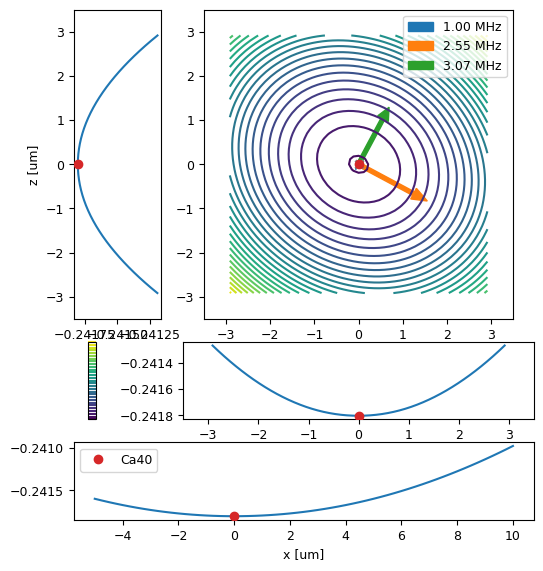

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from models.segmented_trap import SegmentedTrap
from models.segmented_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot_potential_make_layout, plot_potential

from pytrans.ions import Ca40

trap = SegmentedTrap()
waveform = np.load(data_dir / 'waveform_static_segmented_trap.npy')

r0 = (0, 0, trap.z0)
roi = ((-5e-6, 10e-6), 3.5e-6, 3.5e-6)
res = analyse_potential(trap, voltages=waveform[0], ions=Ca40, r0=r0, roi=roi, verbose=False)
res


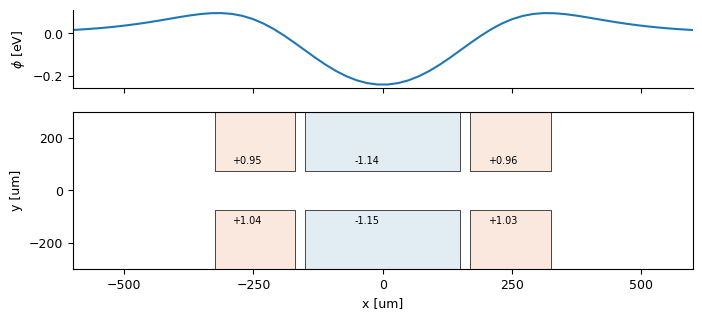

In [4]:
_ = plot_voltages_on_trap(trap, waveform[0])


## Mixed-species ion crystal

--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[ 0.0116 -0.0028 -0.0007]
Gradient [V/m]
[ 0.1871 -0.3389 -0.156 ]
Displacement at 1 MHz [um]
[ 0.0114 -0.0207 -0.0095]
Hessian [V/m2]
[[ 1.6178e+07 -5.6970e+04  3.9072e+04]
 [-5.6970e+04  1.1728e+08  1.9999e+07]
 [ 3.9072e+04  1.9999e+07  1.4385e+08]]
Normal mode frequencies [MHz]
[0.994676 2.55281 3.07465]
Eigenvectors
[[1 0.000644 -0.000407]
 [-0.00076 0.881 -0.473]
 [5.43e-05 0.473 0.881]]
Tilt angle of mode 2 (3.07): 61.80°
--------------
Mode solver analysis for ion crystal [Be9, Ca40, Ca40, Be9]: 
Equilibrium positions [um]
[[-6.3848 -0.004  -0.0462]
 [-2.0254 -0.0038  0.0092]
 [ 2.0093  0.0011  0.0064]
 [ 6.359  -0.0008 -0.0498]]
Normal modes
  Freq [MHz]                     Be9                                Ca40                                Ca40                                 Be9
------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ------

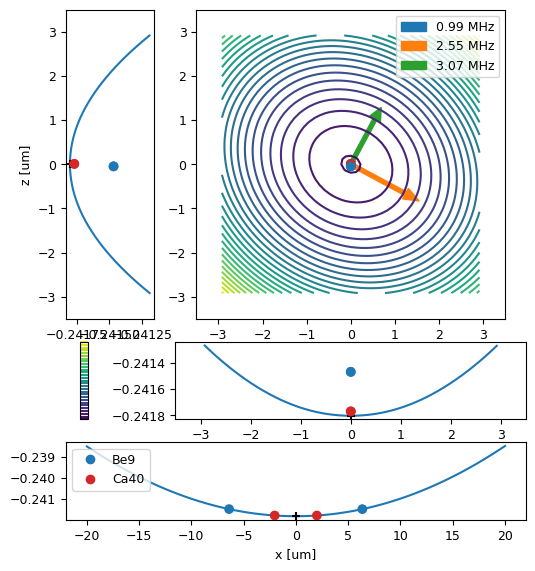

In [5]:
from pytrans.ions import Ca40, Be9
from pytrans.analysis import analyse_potential

r0 = (0, 0, trap.z0)
roi = (20e-6, 3.5e-6, 3.5e-6)

ions = [Be9, Ca40, Ca40, Be9]
res = analyse_potential(trap, voltages=waveform[0], ions=ions, ion1=Ca40, r0=r0, roi=roi, verbose=False)
res

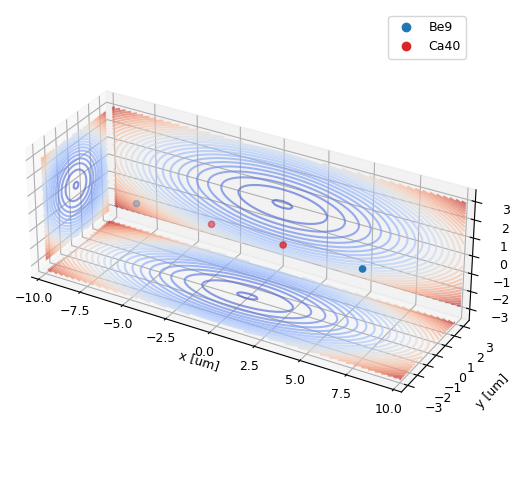

In [6]:
from pytrans.plotting import plot3d_potential

roi = (10e-6, 3.5e-6, 3.5e-6)
_ = plot3d_potential(trap, waveform[0], Ca40, r0, roi, analyse_results=res)